<a href="https://colab.research.google.com/github/IgnacioPardo/SNN/blob/main/SNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple Neural Network

## Situación: 

El problema propuesto para solucionar/predecir con un modelo es el siguiente: Generar un modelo que prediga cual emoció, a partir de las características de diferentes tipos de peliculas, es más probable que el espectador tenga.

### Librerias

In [1]:
!pip install networkx==3.1


[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import HTML, display
import tabulate
import networkx as nx
from random import random as rand
import itertools
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer

In [3]:
np.random.seed(1)

### Funciones

In [4]:
def sigmoid(x):
    return 1 / ( 1 + np.exp(-x) )

# sigmoid = lambda x : 1 / ( 1 + np.exp(-x) )

def sigmoid_derivative(x):
    return x * (1 - x)

# sigmoid_derivative = lambda x : x * (1 - x)

def relu(x):
    return np.maximum(0,x)

## Setup

#### Training Values

Abajo creamos una simulación de un dataframe que muestra las características y emociones que genera un género de películas. Vamos a predecir las emociones en base a las características.

In [5]:
#Nombres de las columnas
#C1 Tensión
#C2 Acción
#C3 Magia
#C4 Chistes
#C5 Trajedia
#C6 Descriptivo
#C7 Futurismo
#C8 Ciencia

#Valores de input, a la derecha es del género de película que representan
training_inputs = np.array([
    [1,1,0,0,0,0,1,1], #1 Ciencia Ficción
    [1,0,1,0,1,0,0,0], #2 Terror
    [0,0,0,1,0,0,0,0], #3 Comedia
    [0,1,1,1,0,0,1,0], #4 Fantasía
    [0,0,1,1,0,1,0,0], #5 Animación
    [1,1,0,0,1,1,0,1], #6 Misterio
    [0,0,0,0,0,0,0,1], #7 Arte
    [0,0,0,0,0,1,0,1], #8 Historia/Documental
])

#Valores de output, o sea, las emociones
training_outputs = np.array([
    [0,0,1,1,1,0,1,0], #A Felicidad,
    [1,1,0,1,0,1,0,0], #B Intriga,
    [0,1,0,0,0,1,0,0], #C Miedo,
    [1,0,1,1,1,0,1,0], #D Seguridad,
    [1,1,0,0,0,1,0,0], #E Confusión,
    [0,0,0,0,0,1,0,1], #F Enojo
    [0,0,0,0,0,0,0,1], #I Aburrimiento
    [0,1,0,0,0,1,0,0], #J Estres
])

display(training_inputs)
display(training_outputs)

array([[1, 1, 0, 0, 0, 0, 1, 1],
       [1, 0, 1, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0],
       [0, 1, 1, 1, 0, 0, 1, 0],
       [0, 0, 1, 1, 0, 1, 0, 0],
       [1, 1, 0, 0, 1, 1, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1, 0, 1]])

array([[0, 0, 1, 1, 1, 0, 1, 0],
       [1, 1, 0, 1, 0, 1, 0, 0],
       [0, 1, 0, 0, 0, 1, 0, 0],
       [1, 0, 1, 1, 1, 0, 1, 0],
       [1, 1, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0, 1, 0, 0]])

In [6]:
#Concatenación entre los valores de input y de output.
training_values = np.concatenate((training_inputs.T, training_outputs.T)).T
table = lambda arr : display(HTML(tabulate.tabulate(arr, tablefmt='html')))
table(training_values)

1,1,0,0,0,0,1,1,0,0,1,1,1,0,1,0
1,0,1,0,1,0,0,0,1,1,0,1,0,1,0,0
0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0
0,1,1,1,0,0,1,0,1,0,1,1,1,0,1,0
0,0,1,1,0,1,0,0,1,1,0,0,0,1,0,0
1,1,0,0,1,1,0,1,0,0,0,0,0,1,0,1
0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0


#### Synaptic weights 

In [7]:
#Acá generamos los pesos sinápticos originales que usará la red.
n1 = training_inputs.shape[1]
n2 = training_inputs.shape[0]

synaptic_weights = np.random.random((n1, n2)) + 1

table(synaptic_weights)

1.41702,1.72032,1.00011,1.30233,1.14676,1.09234,1.18626,1.34556
1.39677,1.53882,1.41919,1.68522,1.20445,1.87812,1.02739,1.67047
1.4173,1.55869,1.14039,1.1981,1.80074,1.96826,1.31342,1.69232
1.87639,1.89461,1.08504,1.03905,1.16983,1.87814,1.09835,1.42111
1.95789,1.53317,1.69188,1.31552,1.6865,1.83463,1.01829,1.75014
1.98886,1.74817,1.28044,1.78928,1.10323,1.44789,1.9086,1.29361
1.28778,1.13003,1.01937,1.67884,1.21163,1.26555,1.49157,1.05336
1.57412,1.14673,1.58931,1.69976,1.10233,1.41406,1.6944,1.41418


## Training

Para obtener un resultado a partir de los inputs y los synaptic weights se realiza la siguiente función:

$$\sum_{i=0}^{n}{x_iw_i}$$

Y se le aplica la función sigmoide para normalizar al rango 0, 1

Por ejemplo, si nuestros inputs $x_i$ son `[1, 1, 1]` y nuestros pesos sinapticos $w_i$ son `[[11.30926442], [-0.20511667], [-5.4500033]]`

Nos resulta la cuenta
$$[1 \times 11.30926442] + [1 \times (-0.20511667)] + [1 \times (-5.4500033)] = 5.6541444499999995$$

Con la función sigmoide es facil ver como $$\operatorname{sigmoid}(5.65) \approx 1$$

In [8]:
eval_NN = lambda x, w: sigmoid(np.dot(x, w))

In [9]:
# 50000 epochs
for iteration in range(50000):

    # Arranca con los valores de training
    input_layer = training_inputs

    # Genera un output haciendo la suma de los valores de input multiplicados por su peso sinaptico, y aplicandole la función sigmoide para normalizar a -1, 1
    # Función de activación
    # Forward propagation
    outputs = eval_NN(input_layer, synaptic_weights)

    # Calculo el error
    # Gradient descendent
    error = training_outputs - outputs

    # Ajusto los pesos en funcion al error y al resultado obtenido
    # Back propagation
    adjustments = error * sigmoid_derivative(outputs)
    synaptic_weights += np.dot(input_layer.T, adjustments)

### Explicación

Esta es una red que no tiene capas ocultas y la función de activación esta en cada una de las neuronas de la capa de salida. La función de activación de cada una de esas neuronas es: sigmoide([x1×w1]+[x2×w2]+...+[xn×wn]). O en términos coloquiales es el resultado de aplicarle la función sigmoide a la suma de los valores de todas las neuronas de entrada por los pesos sinapticos entre dichas neuronas y la neurona de salida. 

Es mediante la función de activación que la red realice el 'forward propagation', es decir el procesamiento de los valores de input para dar valores de output.

La red luego agarra la diferencia entre los valores reales y los predichos para calcular el nivel del error. Y con ese nivel de error ajusta los pesos sinápticos para que la red sea más precisa. A eso se lo llama 'back propagation' y al repetirse varias veces, se va achicando el error. Al achicamiento del error se lo llama 'gradient descendent', que a su vez significa un aumento de la presición de la red.

In [10]:
print('Synaptic weights after training')
table(synaptic_weights)

print('Outputs after training: ')
table(outputs)

Synaptic weights after training


-1.68927,-0.0219549,-1.18999,2.96221,-1.11051,2.37699,-0.991112,-3.96159
0.276028,-11.6514,5.86244,2.21289,5.73934,-4.53489,5.48104,5.5127
9.19239,4.54883,-1.09903,3.54183,-1.04109,-1.05731,-0.950655,-9.90719
-5.24921,5.48158,-5.54136,-5.66346,-5.5389,5.42912,-5.53712,-5.74713
0.330918,1.00134,-3.69202,-0.36753,-3.81892,4.67173,-4.03044,8.44269
1.65919,10.309,-2.25272,-5.05612,-2.19143,10.5922,-1.83324,-9.77644
2.04566,-4.31044,6.86749,6.37965,6.92233,-5.6494,7.08065,-11.7516
-7.43059,-5.19039,-5.54965,-5.69473,-5.54756,-5.19213,-5.55899,4.89389


Outputs after training: 


0.00111458,6.37092e-10,0.997503,0.997157,0.997536,2.26166e-06,0.997556,0.00493425
0.999604,0.996043,0.00251987,0.997842,0.00254645,0.997506,0.00254216,0.004381
0.00522427,0.995854,0.00390592,0.00345852,0.00391551,0.995632,0.00392243,0.0031818
0.998102,0.00264777,0.997739,0.998455,0.997721,0.00298112,0.997703,3.10389e-10
0.996324,1,0.000137316,0.000762809,0.000155083,1,0.000243291,9.02786e-12
0.00105441,0.00385939,0.00108844,0.00261658,0.000977958,0.999635,0.00097438,0.994008
0.000592493,0.00553906,0.0038738,0.00335241,0.00388188,0.00552948,0.00383793,0.992563
0.00310574,0.994051,0.000408605,2.14271e-05,0.00043533,0.995504,0.000615648,0.00752082


## Eval

In [11]:
table(training_values)

1,1,0,0,0,0,1,1,0,0,1,1,1,0,1,0
1,0,1,0,1,0,0,0,1,1,0,1,0,1,0,0
0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0
0,1,1,1,0,0,1,0,1,0,1,1,1,0,1,0
0,0,1,1,0,1,0,0,1,1,0,0,0,1,0,0
1,1,0,0,1,1,0,1,0,0,0,0,0,1,0,1
0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0


In [12]:
large = lambda x : display(HTML('<p style="font-size: 50px; color: #66D148">'+str(x)+'</p>'))

In [13]:
a = 1 #@param {type:"integer"}
b = 0 #@param {type:"integer"}
c = 1 #@param {type:"integer"}
d = 1 #@param {type:"integer"}
e = 1 #@param {type:"integer"}
f = 0 #@param {type:"integer"}
g = 0 #@param {type:"integer"}
h = 0 #@param {type:"integer"}

input_layer = np.array([a, b, c, d, e, f, g, h])
res = sigmoid(np.dot(input_layer, synaptic_weights))
display(res)

thresh = 0.1

out = list(map(lambda x: 0 if x < thresh else 1, res))

large(out)

array([9.29878490e-01, 9.99983461e-01, 9.90564845e-06, 6.16106477e-01,
       1.00351131e-05, 9.99989032e-01, 1.00359012e-05, 1.40450315e-05])

### Graph

En el gráfico generado por el siguiente código, podemos ver de forma gráfica la estructura de la red que realizamos.

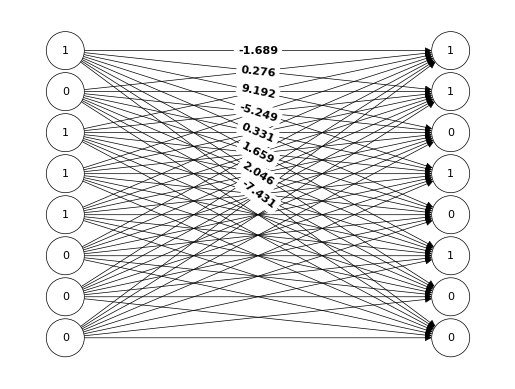

In [14]:
G = nx.DiGraph()
layers = [[0, 1, 2, 3, 4, 5, 6, 7], [8, 9, 10, 11, 12, 13, 14, 15]]

rels = list(itertools.product(*layers))
flatten = lambda l: [x for i in l for x in i]


labels = {i: v for i, v in enumerate(list(input_layer) + list(out))}


weights_labels = {(ra, rb): "{:0.3f}".format(synaptic_weights[i][0]) for i, (ra, rb) in enumerate(rels) if i < len(synaptic_weights)}
G.add_edges_from(rels)

pos = {}
m = max([len(l) for l in layers])
for i, l in enumerate(layers):
  for j, v in enumerate(l):
    pos[v] = (i, len(l) - j)


options = {
    "font_size": 8,
    "node_size": 750,
    "node_color": [(1, 1, 1, 1) for _ in range(len(labels))],
    "edgecolors": "black",
    "linewidths": .5,
    "width": .5,
    "labels": labels,
    "connectionstyle": "arc3, rad=0",
}

node_color = [(1, 1, 1, 1) for _ in flatten(layers)]
options["node_color"] = node_color
nx.draw_networkx(G, pos, **options)

nx.draw_networkx_edge_labels(
    G, pos,
    edge_labels=weights_labels,
    font_color='black',
    font_size=8, 
    font_weight='bold'
)

plt.axis('off')
ax = plt.gca()
ax.margins(.085)
plt.show()

El grafico muestra las neuronas de entrda y las de salida. Unicamente se incluyen los pesos de la primera neuroa, con respecto a todas las de salida, como ejemplo grafico, para no obstaculizar la visón y que sea entendible.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=82887b2c-05f6-421c-931b-0019ecfcd6a7' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>